In [12]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import pandas as pd
import cv2
from pathlib import Path
import os
import glob
import sys
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from tensorflow.keras.models import Sequential as seq
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.layers import AveragePooling2D
from keras_preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

In [92]:
df = pd.read_csv('train.csv')
trainpath = 'C:/Users/91709/Desktop/train_images/'  
test_path='C:/Users/91709/Desktop/test_images/'
df_test = pd.read_csv('test.csv')
print(df)
classes = list(np.unique(df['ClassName']))
print(len(classes))
classDict = {}
for i in range(61):
    classDict[classes[i]]=i
imgIdsList=df['ImageId']
clsNameList=df['ClassName']
trial_label={}
for i in range(len(df)):
    trial_label[imgIdsList[i]]=classDict[clsNameList[i]]
X = []
Y = []
l=0
for imgName,clsID in trial_label.items():
    currImagePath=os.path.join(trainpath,imgName)
    img=cv2.imread(currImagePath)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(64,64))
    X.append(resized)
    Y.append(clsID)
    l+=1


             ImageId                 ClassName
0     f27632d7e5.jpg                     water
1     efa87919ed.jpg    pizza-margherita-baked
2     4f169e8c8d.jpg                  broccoli
3     a6956654bf.jpg    salad-leaf-salad-green
4     d99ce8c3bf.jpg                       egg
...              ...                       ...
9318  ba8233c7d2.jpg  bread-french-white-flour
9319  2090043907.jpg                  wine-red
9320  8762d1cefd.jpg                    carrot
9321  28e7439245.jpg                  broccoli
9322  ba263cfb41.jpg                  cucumber

[9323 rows x 2 columns]
61


In [3]:
X=np.asarray(X,'float')/256
Y_array=np.array(Y)
X_train,X_test,y_train,y_test=train_test_split(X,Y_array,test_size=0.30,random_state=2)
print(len(y_train))

6526


In [4]:
def Model1(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(258, activation='relu', name='fc')(X)
    X = Dense(61, activation='softmax', name='fc2')(X)
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Model')
    
    
    ### END CODE HERE ###
    
    return model

# Model1
conv0->conv1->max1->conv2->max->conv3->dropout->con4->flatten->fc0->fc1
A basic model with 2 convnet layers followed by maxpool followed by conv,maxpool and then 2 fullyconnected layers

In [31]:
model=seq(name='Model1')
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',input_shape=(64,64,3,),name='conv0'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv1'))
model.add(MaxPooling2D((2,2),name='max1'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv2'))
model.add(MaxPooling2D((2,2),name='max2'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',name='conv3'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',name='conv4'))
model.add(Flatten())
model.add(Dense(258,activation='relu',name='fc0'))                                            
model.add(Dense(61,activation='softmax',name='fc1'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 64)        18496     
_________________________________________________________________
max1 (MaxPooling2D)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 64)        36928     
_________________________________________________________________
max2 (MaxPooling2D)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 128)       73856     
_________________________________________________________________
conv4 (Conv2D)               (None, 10, 10, 256)       29516

In [32]:
m=model.fit(x=X_train, y=y_train, epochs=10, batch_size=10,validation_data=(X_test,y_test))

Epoch 1/10
653/653 [==============================] - 99s 151ms/step - loss: 3.7401 - acc: 0.1112 - val_loss: 3.5955 - val_acc: 0.1344
Epoch 2/10
653/653 [==============================] - 98s 151ms/step - loss: 3.4916 - acc: 0.1489 - val_loss: 3.4375 - val_acc: 0.1666
Epoch 3/10
653/653 [==============================] - 96s 147ms/step - loss: 3.3778 - acc: 0.1709 - val_loss: 3.3028 - val_acc: 0.1938
Epoch 4/10
653/653 [==============================] - 95s 146ms/step - loss: 3.1961 - acc: 0.2086 - val_loss: 3.1942 - val_acc: 0.2167
Epoch 5/10
653/653 [==============================] - 92s 140ms/step - loss: 3.0434 - acc: 0.2355 - val_loss: 3.1900 - val_acc: 0.2199
Epoch 6/10
653/653 [==============================] - 102s 157ms/step - loss: 2.8488 - acc: 0.2682 - val_loss: 3.1799 - val_acc: 0.2149
Epoch 7/10
653/653 [==============================] - 96s 147ms/step - loss: 2.6188 - acc: 0.3063 - val_loss: 3.1939 - val_acc: 0.2295
Epoch 8/10
653/653 [==============================] - 

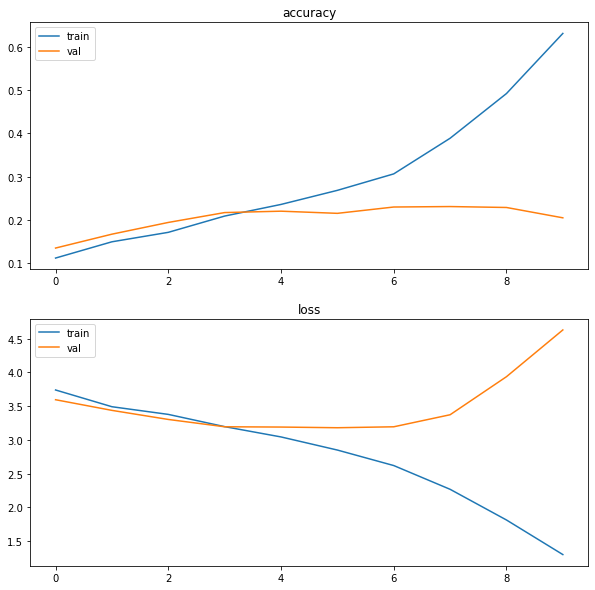

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(212)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

# Adding Batch Normalisation
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and is known dramatically reducing the number of training epochs required to train deep networks.
Batch normalization offers some regularization effect, reducing generalization error, perhaps no longer requiring the use of dropout for regularization. So removing drop out

In [26]:
model=seq(name='Model2')
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',input_shape=(64,64,3,),name='conv0'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2),name='max1'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2),name='max2'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',name='conv3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',name='conv4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(258,activation='relu',name='fc0'))

model.add(Dense(61,activation='softmax',name='fc1'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "Model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
activation_3 (Activation)    (None, 60, 60, 64)        0         
_________________________________________________________________
max1 (MaxPooling2D)          (None, 30, 30, 64)        0    

In [28]:
m=model.fit(x=X_train, y=y_train, epochs=10, batch_size=10,validation_data=(X_test,y_test))

Epoch 1/10
653/653 [==============================] - 136s 208ms/step - loss: 3.7097 - acc: 0.1407 - val_loss: 3.7048 - val_acc: 0.1766
Epoch 2/10
653/653 [==============================] - 136s 208ms/step - loss: 3.3670 - acc: 0.1911 - val_loss: 3.4437 - val_acc: 0.2020
Epoch 3/10
653/653 [==============================] - 134s 205ms/step - loss: 3.2035 - acc: 0.2112 - val_loss: 4.5633 - val_acc: 0.1502
Epoch 4/10
653/653 [==============================] - 155s 237ms/step - loss: 3.0565 - acc: 0.2298 - val_loss: 3.3994 - val_acc: 0.1941
Epoch 5/10
653/653 [==============================] - 147s 224ms/step - loss: 2.9316 - acc: 0.2504 - val_loss: 3.3363 - val_acc: 0.2127
Epoch 6/10
653/653 [==============================] - 151s 231ms/step - loss: 2.7813 - acc: 0.2703 - val_loss: 3.5310 - val_acc: 0.1959
Epoch 7/10
653/653 [==============================] - 156s 239ms/step - loss: 2.6604 - acc: 0.2835 - val_loss: 3.5042 - val_acc: 0.2084
Epoch 8/10
653/653 [============================

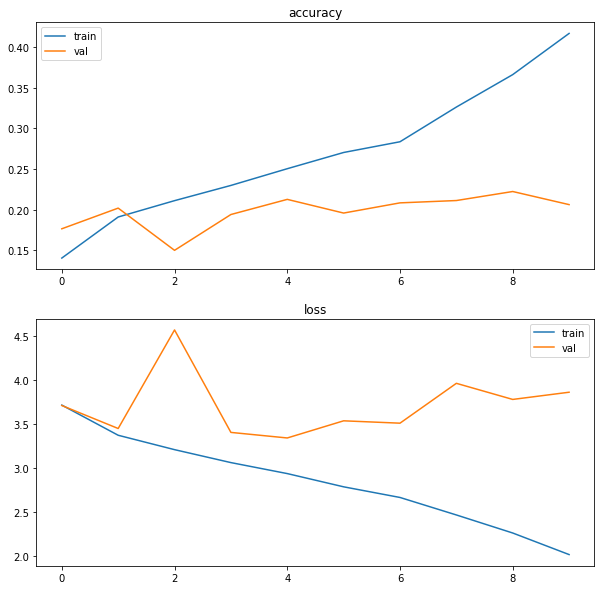

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(212)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

# Adding a layer
Adding a conv layer and maxpool layer to the above architecture. conv0->conv1->max1->conv2->max->conv3->con4->max2->con5->flatten->fc0->fc1 A basic model with 2 convnet layers followed by maxpool followed by conv,maxpool and then 2 fullyconnected layers

In [34]:
model=seq(name='Model3')
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',input_shape=(64,64,3,),name='conv0'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv1'))
model.add(MaxPooling2D((2,2),name='max1'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv2'))
model.add(MaxPooling2D((2,2),name='max2'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',name='conv3'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',name='conv4'))
model.add(MaxPooling2D((2,2),name='max3'))
model.add(Conv2D(kernel_size=(3,3),filters=512,activation='relu',name='conv5'))
model.add(Flatten())
model.add(Dense(514,activation='relu',name='fc0'))                                            
model.add(Dense(61,activation='softmax',name='fc1'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()


Model: "Model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 64)        18496     
_________________________________________________________________
max1 (MaxPooling2D)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 64)        36928     
_________________________________________________________________
max2 (MaxPooling2D)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 128)       73856     
_________________________________________________________________
conv4 (Conv2D)               (None, 10, 10, 256)       29516

In [35]:
m=model.fit(x=X_train, y=y_train, epochs=10, batch_size=10,validation_data=(X_test,y_test))

Epoch 1/10
653/653 [==============================] - 102s 156ms/step - loss: 3.7700 - acc: 0.1027 - val_loss: 3.6798 - val_acc: 0.1301
Epoch 2/10
653/653 [==============================] - 101s 155ms/step - loss: 3.5492 - acc: 0.1405 - val_loss: 3.5088 - val_acc: 0.1480
Epoch 3/10
653/653 [==============================] - 105s 161ms/step - loss: 3.4871 - acc: 0.1508 - val_loss: 3.5574 - val_acc: 0.1419
Epoch 4/10
653/653 [==============================] - 110s 168ms/step - loss: 3.3848 - acc: 0.1730 - val_loss: 3.3243 - val_acc: 0.1784
Epoch 5/10
653/653 [==============================] - 108s 165ms/step - loss: 3.2189 - acc: 0.2023 - val_loss: 3.1433 - val_acc: 0.2174
Epoch 6/10
653/653 [==============================] - 114s 174ms/step - loss: 3.0702 - acc: 0.2271 - val_loss: 3.1434 - val_acc: 0.2181
Epoch 7/10
653/653 [==============================] - 105s 161ms/step - loss: 2.9486 - acc: 0.2413 - val_loss: 3.0696 - val_acc: 0.2327
Epoch 8/10
653/653 [============================

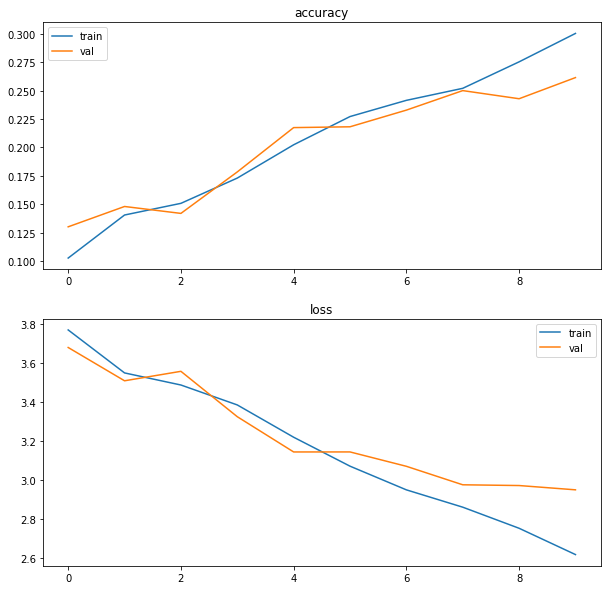

In [38]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(212)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])
plt.show()

# Adding drop out
Drop out adds the effect of regularisation.Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

In [39]:
model=seq(name='Model4')
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',input_shape=(64,64,3,),name='conv0'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv1'))
model.add(MaxPooling2D((2,2),name='max1'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv2'))
model.add(MaxPooling2D((2,2),name='max2'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',name='conv3'))
model.add(Dropout(0.25,name='dropout'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',name='conv4'))
model.add(MaxPooling2D((2,2),name='max3'))
model.add(Conv2D(kernel_size=(3,3),filters=512,activation='relu',name='conv5'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(514,activation='relu',name='fc0'))                                            
model.add(Dense(61,activation='softmax',name='fc1'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "Model4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 64)        18496     
_________________________________________________________________
max1 (MaxPooling2D)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 64)        36928     
_________________________________________________________________
max2 (MaxPooling2D)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0    

In [40]:
m=model.fit(x=X_train, y=y_train, epochs=10, batch_size=10,validation_data=(X_test,y_test))

Epoch 1/10
653/653 [==============================] - 97s 149ms/step - loss: 3.6935 - acc: 0.1145 - val_loss: 3.6261 - val_acc: 0.1287
Epoch 2/10
653/653 [==============================] - 97s 149ms/step - loss: 3.5144 - acc: 0.1454 - val_loss: 3.5230 - val_acc: 0.1498
Epoch 3/10
653/653 [==============================] - 98s 151ms/step - loss: 3.3986 - acc: 0.1646 - val_loss: 3.3351 - val_acc: 0.1655
Epoch 4/10
653/653 [==============================] - 96s 147ms/step - loss: 3.2872 - acc: 0.1917 - val_loss: 3.2153 - val_acc: 0.2034
Epoch 5/10
653/653 [==============================] - 98s 150ms/step - loss: 3.1679 - acc: 0.2108 - val_loss: 3.1298 - val_acc: 0.2206
Epoch 6/10
653/653 [==============================] - 107s 163ms/step - loss: 3.0464 - acc: 0.2348 - val_loss: 3.1081 - val_acc: 0.2245
Epoch 7/10
653/653 [==============================] - 110s 169ms/step - loss: 2.9570 - acc: 0.2484 - val_loss: 2.9823 - val_acc: 0.2399
Epoch 8/10
653/653 [==============================] -

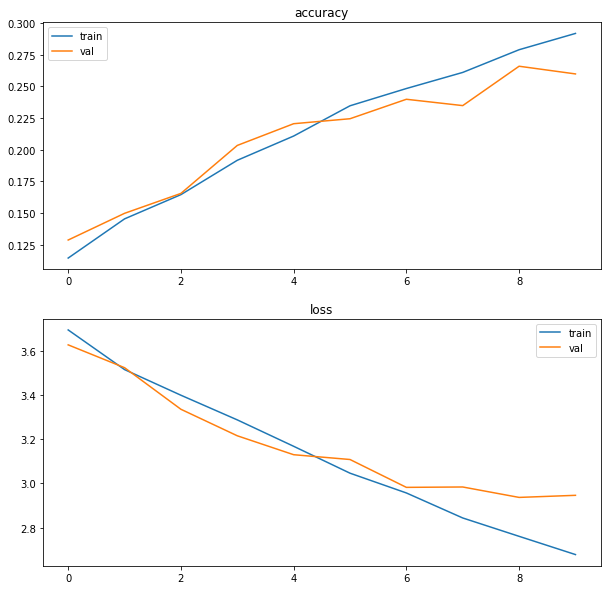

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(212)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])
plt.show()

# Different Activation
Leaky ReLU function is an improved version of the ReLU activation function. As for the ReLU activation function, the gradient is 0 for all the values of inputs that are less than zero, which would deactivate the neurons in that region and may cause dying ReLU problem.

Leaky ReLU is defined to address this problem. Instead of defining the ReLU activation function as 0 for negative values of inputs(x), we define it as an extremely small linear component of x. Here is the formula for this activation function

In [42]:
model=seq(name='Model5')
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',input_shape=(64,64,3,),name='conv0'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv1'))
model.add(MaxPooling2D((2,2),name='max1'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv2'))
model.add(MaxPooling2D((2,2),name='max2'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',name='conv3'))
model.add(Dropout(0.25,name='dropout'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',name='conv4'))
model.add(MaxPooling2D((2,2),name='max3'))
model.add(Conv2D(kernel_size=(3,3),filters=512,activation='relu',name='conv5'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(514,activation='relu',name='fc0'))                                            
model.add(Dense(61,activation=tf.keras.layers.LeakyReLU(alpha=0.3),name='fc1'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "Model5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 64)        18496     
_________________________________________________________________
max1 (MaxPooling2D)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 64)        36928     
_________________________________________________________________
max2 (MaxPooling2D)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0    

In [43]:
m=model.fit(x=X_train, y=y_train, epochs=10, batch_size=10,validation_data=(X_test,y_test))

Epoch 1/10
653/653 [==============================] - 106s 162ms/step - loss: 4.3177 - acc: 0.0152 - val_loss: 4.1109 - val_acc: 0.0132
Epoch 2/10
653/653 [==============================] - 105s 161ms/step - loss: 4.1202 - acc: 0.0352 - val_loss: 4.1109 - val_acc: 0.0593
Epoch 3/10
653/653 [==============================] - 103s 158ms/step - loss: 4.1109 - acc: 0.0556 - val_loss: 4.1109 - val_acc: 0.0593
Epoch 4/10
653/653 [==============================] - 103s 158ms/step - loss: 4.1109 - acc: 0.0552 - val_loss: 4.1109 - val_acc: 0.0593
Epoch 5/10
653/653 [==============================] - 101s 155ms/step - loss: 4.1109 - acc: 0.0558 - val_loss: 4.1109 - val_acc: 0.0593
Epoch 6/10
653/653 [==============================] - 101s 154ms/step - loss: 4.1109 - acc: 0.0544 - val_loss: 4.1109 - val_acc: 0.0593
Epoch 7/10
653/653 [==============================] - 106s 163ms/step - loss: 4.1109 - acc: 0.0561 - val_loss: 4.1109 - val_acc: 0.0593
Epoch 8/10
653/653 [============================

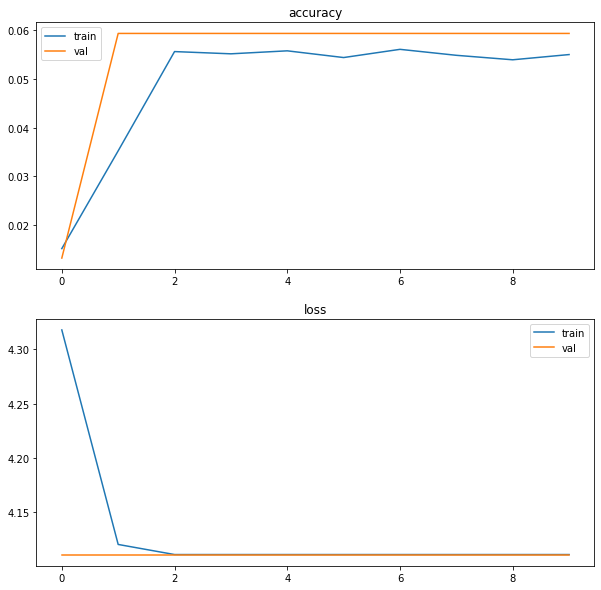

In [44]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(212)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])
plt.show()

# Different pooling strategy
Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. Two common pooling methods are average pooling and max pooling that summarize the average presence of a feature and the most activated presence of a feature respectively.

In [45]:
model=seq(name='Model6')
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',input_shape=(64,64,3,),name='conv0'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv1'))
model.add(AveragePooling2D((2,2),name='avg1'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv2'))
model.add(AveragePooling2D((2,2),name='max2'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',name='conv3'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',name='conv4'))
model.add(Flatten())
model.add(Dense(258,activation='relu',name='fc0'))                                            
model.add(Dense(61,activation='softmax',name='fc1'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "Model6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 64)        18496     
_________________________________________________________________
avg1 (AveragePooling2D)      (None, 30, 30, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 64)        36928     
_________________________________________________________________
max2 (AveragePooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 128)       73856     
_________________________________________________________________
conv4 (Conv2D)               (None, 10, 10, 256)       29516

In [46]:
m=model.fit(x=X_train, y=y_train, epochs=10, batch_size=10,validation_data=(X_test,y_test))

Epoch 1/10
653/653 [==============================] - 94s 144ms/step - loss: 3.7306 - acc: 0.1099 - val_loss: 3.5885 - val_acc: 0.1448
Epoch 2/10
653/653 [==============================] - 96s 147ms/step - loss: 3.4781 - acc: 0.1592 - val_loss: 3.4499 - val_acc: 0.1680
Epoch 3/10
653/653 [==============================] - 96s 147ms/step - loss: 3.3060 - acc: 0.1836 - val_loss: 3.3054 - val_acc: 0.1891
Epoch 4/10
653/653 [==============================] - 95s 145ms/step - loss: 3.1728 - acc: 0.2092 - val_loss: 3.1668 - val_acc: 0.1970
Epoch 5/10
653/653 [==============================] - 91s 139ms/step - loss: 3.0383 - acc: 0.2269 - val_loss: 3.1144 - val_acc: 0.2188
Epoch 6/10
653/653 [==============================] - 97s 148ms/step - loss: 2.8874 - acc: 0.2576 - val_loss: 3.0725 - val_acc: 0.2217
Epoch 7/10
653/653 [==============================] - 91s 139ms/step - loss: 2.7018 - acc: 0.2911 - val_loss: 3.0385 - val_acc: 0.2370
Epoch 8/10
653/653 [==============================] - 9

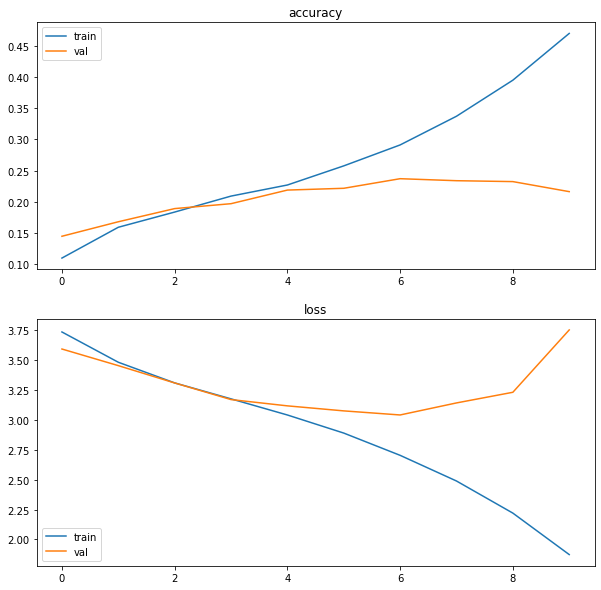

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(212)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])
plt.show()

# Different Optimizers
How you should change your weights or learning rates of your neural network to reduce the losses is defined by the optimizers you use. Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible.

In [48]:
model=seq(name='Model7')
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',input_shape=(64,64,3,),name='conv0'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv1'))
model.add(AveragePooling2D((2,2),name='avg1'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv2'))
model.add(AveragePooling2D((2,2),name='max2'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',name='conv3'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',name='conv4'))
model.add(Flatten())
model.add(Dense(258,activation='relu',name='fc0'))                                            
model.add(Dense(61,activation='softmax',name='fc1'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "Model7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 64)        18496     
_________________________________________________________________
avg1 (AveragePooling2D)      (None, 30, 30, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 64)        36928     
_________________________________________________________________
max2 (AveragePooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 128)       73856     
_________________________________________________________________
conv4 (Conv2D)               (None, 10, 10, 256)       29516

In [49]:
m=model.fit(x=X_train, y=y_train, epochs=10, batch_size=10,validation_data=(X_test,y_test))

Epoch 1/10
653/653 [==============================] - 134s 204ms/step - loss: 3.7164 - acc: 0.1322 - val_loss: 3.4731 - val_acc: 0.1759
Epoch 2/10
653/653 [==============================] - 119s 182ms/step - loss: 3.3439 - acc: 0.1981 - val_loss: 3.2895 - val_acc: 0.1984
Epoch 3/10
653/653 [==============================] - 117s 179ms/step - loss: 3.1343 - acc: 0.2295 - val_loss: 3.0992 - val_acc: 0.2320
Epoch 4/10
653/653 [==============================] - 121s 185ms/step - loss: 2.9895 - acc: 0.2508 - val_loss: 3.2658 - val_acc: 0.2385
Epoch 5/10
653/653 [==============================] - 122s 187ms/step - loss: 2.8594 - acc: 0.2795 - val_loss: 3.2559 - val_acc: 0.2349
Epoch 6/10
653/653 [==============================] - 120s 184ms/step - loss: 2.7716 - acc: 0.2951 - val_loss: 3.3334 - val_acc: 0.2463
Epoch 7/10
653/653 [==============================] - 122s 187ms/step - loss: 2.7025 - acc: 0.3131 - val_loss: 3.0231 - val_acc: 0.2706
Epoch 8/10
653/653 [============================

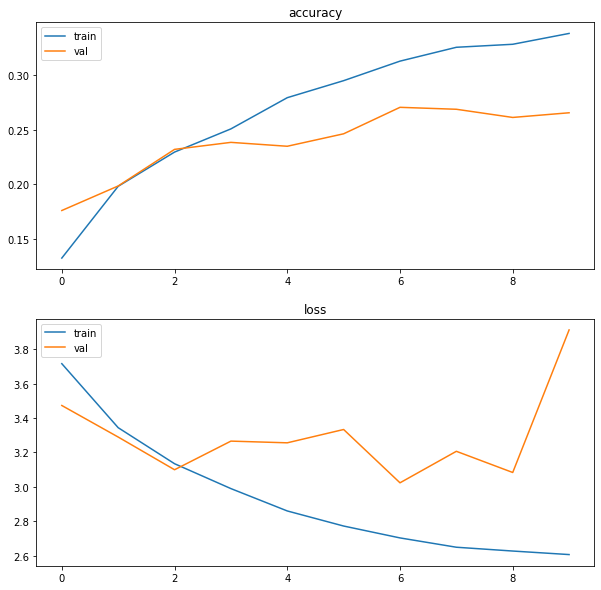

In [50]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(212)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])
plt.show()

# Data Augmentation
Used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning mode

In [52]:
model=seq(name='Model1')
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',input_shape=(64,64,3,),name='conv0'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv1'))
model.add(MaxPooling2D((2,2),name='max1'))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu',name='conv2'))
model.add(MaxPooling2D((2,2),name='max2'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',name='conv3'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',name='conv4'))
model.add(Flatten())
model.add(Dense(258,activation='relu',name='fc0'))                                            
model.add(Dense(61,activation='softmax',name='fc1'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 32)        896       
_________________________________________________________________
conv1 (Conv2D)               (None, 60, 60, 64)        18496     
_________________________________________________________________
max1 (MaxPooling2D)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 64)        36928     
_________________________________________________________________
max2 (MaxPooling2D)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 128)       73856     
_________________________________________________________________
conv4 (Conv2D)               (None, 10, 10, 256)       29516

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
203/203 [==============================] - 68s 334ms/step - loss: 3.7100 - acc: 0.1158 - val_loss: 3.5683 - val_acc: 0.1523
Epoch 2/10
203/203 [==============================] - 67s 330ms/step - loss: 3.4101 - acc: 0.1720 - val_loss: 3.2876 - val_acc: 0.1877
Epoch 3/10
203/203 [==============================] - 67s 329ms/step - loss: 3.2516 - acc: 0.1905 - val_loss: 3.1533 - val_acc: 0.2095
Epoch 4/10
203/203 [==============================] - 66s 326ms/step - loss: 3.1408 - acc: 0.2140 - val_loss: 3.2265 - val_acc: 0.1881
Epoch 5/10
203/203 [==============================] - 66s 326ms/step - loss: 3.0621 - acc: 0.2216 - val_loss: 3.0918 - val_acc: 0.2263
Epoch 6/10
203/203 [==============================] - 68s 334ms/step - loss: 2.9468 - acc: 0.2438 - val_loss: 2.9465 - val_acc: 0.2456
Epoch 7/10
203/203 [==============================] - 74s 365ms/step - loss: 2.8515 - acc: 0.2624 - val_loss: 2.82

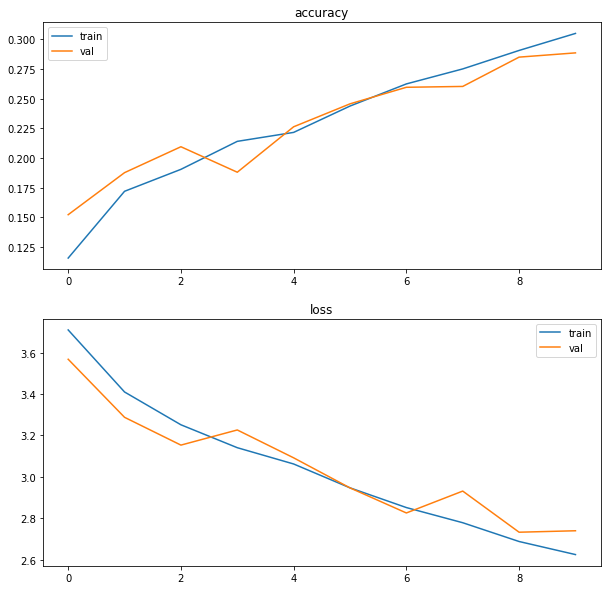

In [53]:
# performing data argumentation by training image generator
dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1)

# training the model
m=model.fit_generator(dataAugmentaion.flow(X_train, y_train, batch_size = 32),
validation_data = (X_test, y_test), steps_per_epoch = len(X_train) // 32,epochs = 10)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(212)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [86]:
print(df_test)
imgIdsList=df_test['ImageId']
X_test = []
l=0
for imgName in imgIdsList:
    currImagePath=os.path.join(test_path,imgName)
    img=cv2.imread(currImagePath)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    resized=cv2.resize(img,(64,64))
    X_test.append(resized)
    l+=1


            ImageId
0    90e63a2fde.jpg
1    a554d1ca8d.jpg
2    48317e8ee8.jpg
3    79528df667.jpg
4    6d2f2f63f5.jpg
..              ...
479  843b8695df.jpg
480  584490f483.jpg
481  d5df1ab5ec.jpg
482  79e3e01b88.jpg
483  a05a4fe910.jpg

[484 rows x 1 columns]


In [87]:
X_test=np.asarray(X_test,'float')
y_test=model.predict(X_test)


In [99]:

def get_key(val):
    for key, value in classDict.items():
         if val == value:
             return key
 
    return "key doesn't exist"
test=np.argmax(y_test,axis=1)
test2=[]
for example in test:
    test2.append(get_key(example))


['coffee-with-caffeine',
 'water',
 'coffee-with-caffeine',
 'carrot',
 'rice',
 'coffee-with-caffeine',
 'wine-red',
 'banana',
 'carrot',
 'coffee-with-caffeine',
 'coffee-with-caffeine',
 'coffee-with-caffeine',
 'chips-french-fries',
 'sweet-pepper',
 'egg',
 'boisson-au-glucose-50g',
 'chips-french-fries',
 'carrot',
 'carrot',
 'salad-leaf-salad-green',
 'carrot',
 'sweet-pepper',
 'carrot',
 'bread-white',
 'carrot',
 'coffee-with-caffeine',
 'carrot',
 'mandarine',
 'coffee-with-caffeine',
 'tea-green',
 'salad-leaf-salad-green',
 'carrot',
 'chips-french-fries',
 'banana',
 'carrot',
 'carrot',
 'coffee-with-caffeine',
 'beer',
 'mixed-vegetables',
 'mixed-vegetables',
 'carrot',
 'coffee-with-caffeine',
 'coffee-with-caffeine',
 'carrot',
 'coffee-with-caffeine',
 'chips-french-fries',
 'banana',
 'carrot',
 'salad-leaf-salad-green',
 'carrot',
 'boisson-au-glucose-50g',
 'mandarine',
 'wine-red',
 'mandarine',
 'carrot',
 'carrot',
 'carrot',
 'coffee-with-caffeine',
 'salad

In [100]:
df = pd.DataFrame(test2) 
    
# saving the dataframe 
df.to_csv('GFG.csv') 